In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
# shape- 42000 images(rows), each with 784 pixels(columns) 

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

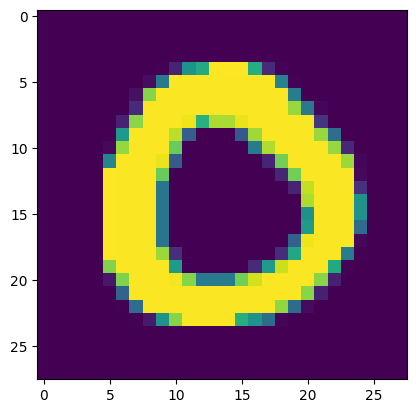

In [7]:
plt.imshow(df.iloc[4,1:].values.reshape(28,28))

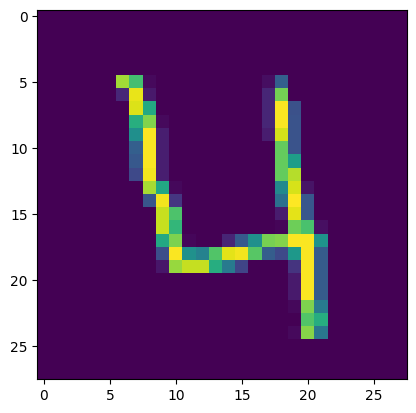

In [8]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28))

In [9]:
# provided values of label, showed image which(number) in Mnist dataset.

In [10]:
#train test split
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
y_train.shape

(33600,)

In [14]:
# applying knearestneighbors without principal component analysis.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
# fit and transform 
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#calculating time 
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# applying pca - reducing dimensions
from sklearn.decomposition import PCA 
pca= PCA(n_components=200)

In [41]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [28]:
X_train.shape

(33600, 784)

In [29]:
X_train_trf.shape

(33600, 200)

In [30]:
# dimension reduced from 784 to 200 using parameter n_components in PCA

In [42]:
knn=KNeighborsClassifier()

In [43]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [44]:
y_pred=knn.predict(X_test_trf)

In [45]:
accuracy_score(y_test,y_pred)

0.9513095238095238

In [36]:
# in 784 dimensional dataset we get an accuracy of 96% but when we reduced the dimension to 200 we still get the accuracy of 95%
#the core working of pca is just to work with less and best numbers of features without hurting the accuracy.

In [37]:
# using conditions run a loop to get which features together make a 90% of variance in the dataset, use them in n_components

In [48]:
for i in range(1,10):
    pca=PCA(n_components=9)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

0.8864285714285715
0.8869047619047619
0.8866666666666667
0.8876190476190476
0.8870238095238095
0.886547619047619
0.8861904761904762
0.8863095238095238
0.886547619047619


In [49]:
#for i in range(1,10): ideally this should be 784 but to make code's life a little bit easier , i've reduced it to 9,according to my previus observations the accuracy is around 88% initially, increasing gradually

In [50]:
X_train_trf

array([[-2.71863012, -0.48976701,  1.1355628 , ..., -0.53955922,
        -0.52759169, -3.3522514 ],
       [-0.67697859, -6.75360059, -2.33585992, ...,  0.45085811,
        -1.14690949,  3.47799757],
       [-3.03323426,  6.50983395,  7.49180147, ...,  1.70904576,
         0.34318544,  3.71077486],
       ...,
       [ 2.14883241,  0.78074698, -0.7474436 , ..., -0.76286636,
         0.4472631 ,  3.36106682],
       [ 1.05957253,  0.94766949,  3.94973373, ...,  0.17830689,
         0.91986669, -2.64685752],
       [17.70257858,  1.96163176, -4.94371804, ..., -4.13498416,
        -4.56862535,  1.49550935]])

In [55]:
# visualization using plotly lib
import plotly.express as px
y_train_trf = y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              color=y_train_trf,
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [56]:
#visualization in 3D
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
X_train_trf

array([[-2.71860963, -0.48966179,  1.13496904],
       [-0.67697909, -6.75419032, -2.33658405],
       [-3.0332491 ,  6.50981295,  7.49262011],
       ...,
       [ 2.14885266,  0.78065329, -0.74731133],
       [ 1.05959182,  0.94814651,  3.9493257 ],
       [17.7025837 ,  1.9623023 , -4.94358326]])

In [57]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [58]:
pca.explained_variance_

array([40.67111198, 29.17023391, 26.74459601])

In [59]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [60]:
pca.explained_variance_.shape

(784,)

In [61]:
pca.components_.shape

(784, 784)

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

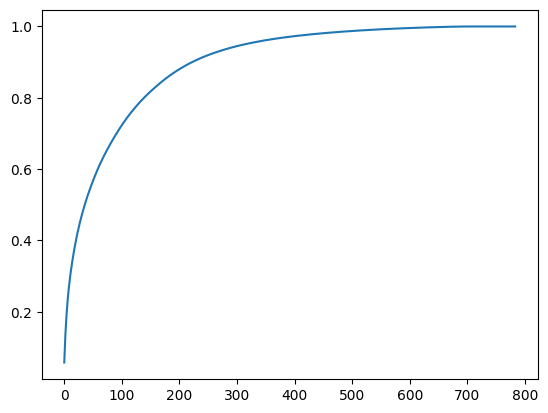

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# we're getting 90% of variance within ~250 approx, which is suffiecient for a better model.